<a href="https://colab.research.google.com/github/GaetanAm/Sentiment-Analysis-and-Impact-on-Financial-Markets/blob/main/notebooks/Test_yfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [27]:
import yfinance as yf

# Récupérer des données pour un symbole donné
stock = yf.Ticker("AAPL")  # Exemple : Apple
news = stock.news  # Récupère les titres d'actualité

# Afficher les titres
for item in news:
    print(item['title'])


Apple Inc. (AAPL) Retains Buy Rating as AI-Driven iPhone Upgrades Boost Revenue Prospects
7 AI Stocks I Own and Won't Stop Buying
EU Ends Probes on Amazon, Starbucks, Fiat Tax Deals After Court Defeats
Tech, Media & Telecom Roundup: Market Talk
Indonesia wrangles with Apple and suppliers brace for tariffs
Roblox will now give users 25% more of its in-game currency if you buy Robux on its website
Google Seeks to Undo Epic Games Antitrust Win Over App Store
Black Friday tech tips for shopping for video games, headphones, TVs, and more


In [33]:
import pandas as pd

data = [{"title": item['title'], "date": item['providerPublishTime']} for item in news]
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'], unit='s')  # Si vos dates sont des timestamps
df['date'] = df['date'].dt.date  # Garder uniquement la partie date (sans heure)
print(df.head())


                                               title        date
0  Apple Inc. (AAPL) Retains Buy Rating as AI-Dri...  2024-11-28
1            7 AI Stocks I Own and Won't Stop Buying  2024-11-28
2  EU Ends Probes on Amazon, Starbucks, Fiat Tax ...  2024-11-28
3         Tech, Media & Telecom Roundup: Market Talk  2024-11-28
4  Indonesia wrangles with Apple and suppliers br...  2024-11-28


In [4]:
!pip install transformers

In [34]:
from transformers import pipeline

# Charger FinBERT
sentiment_pipeline = pipeline("sentiment-analysis", model="yiyanghkust/finbert-tone")

# Analyser les sentiments des titres
df['sentiment'] = df['title'].apply(lambda x: sentiment_pipeline(x)[0]['label'])
print(df.head())

                                               title        date sentiment
0  Apple Inc. (AAPL) Retains Buy Rating as AI-Dri...  2024-11-28  Positive
1            7 AI Stocks I Own and Won't Stop Buying  2024-11-28   Neutral
2  EU Ends Probes on Amazon, Starbucks, Fiat Tax ...  2024-11-28   Neutral
3         Tech, Media & Telecom Roundup: Market Talk  2024-11-28   Neutral
4  Indonesia wrangles with Apple and suppliers br...  2024-11-28   Neutral


<Axes: title={'center': 'Distribution des sentiments'}, xlabel='sentiment'>

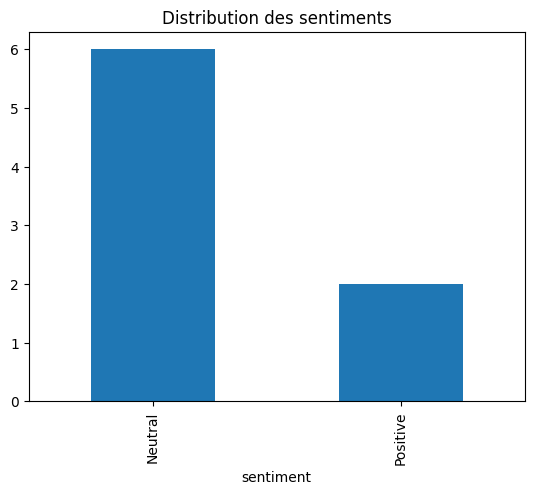

In [35]:
df['sentiment'].value_counts().plot(kind='bar', title='Distribution des sentiments')

In [37]:
df['date'] = pd.to_datetime(df['date'])
sentiment_trend = df.groupby(df['date'].dt.floor('d'))['sentiment'].value_counts().unstack(fill_value=0)
print(sentiment_trend.head())

sentiment   Neutral  Positive
date                         
2024-11-27        2         1
2024-11-28        4         1


<Axes: title={'center': 'Tendances des sentiments par jour'}, xlabel='date'>

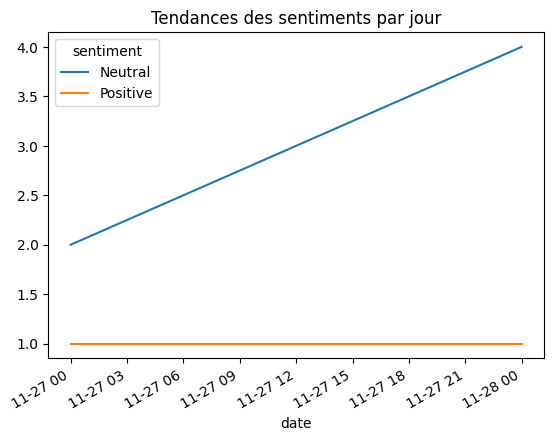

In [38]:
sentiment_trend.plot(kind='line', title='Tendances des sentiments par jour')

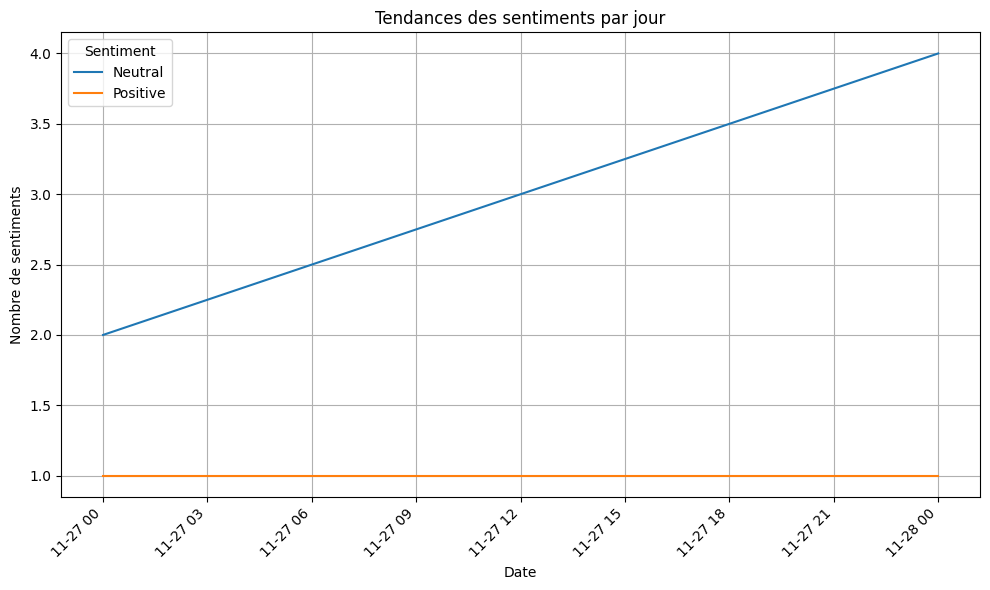

In [40]:
import matplotlib.pyplot as plt

sentiment_trend.plot(kind='line', figsize=(10, 6), title='Tendances des sentiments par jour')
plt.xlabel('Date')
plt.ylabel('Nombre de sentiments')
plt.xticks(rotation=45)  # Tourner les dates pour éviter le chevauchement
plt.grid(True)
plt.legend(title='Sentiment')
plt.tight_layout()  # Ajuster automatiquement pour une bonne lisibilité
plt.show()

